In [ ]:
# https://github.com/danielwilczak101/EasyGA
!pip install EasyGA

### Base de Dados:

- http://artemisa.unicauca.edu.co/~johnyortega/instances_01_KP/
- Gerador de base de dados: http://hjemmesider.diku.dk/~pisinger/codes.html

In [2]:
import EasyGA
import random

In [32]:
# Define as instâncias das bases de dados
# fileName = '/content/f1_l-d_kp_10_269'
# capacidade = 269
# optimalSolution = 295

fileName = '/content/f2_l-d_kp_20_878'
capacidade = 878
optimalSolution = 1024

In [33]:
# Faz a leitura do arquivo
peso = []
custo = []
with open(fileName) as f:
  # Ignorar a primeira linha
  next(f)
  for line in f:
    v, w = line.split()
    peso.append(int(w))
    custo.append(int(v))


In [34]:
peso

[92, 4, 43, 83, 84, 68, 92, 82, 6, 44, 32, 18, 56, 83, 25, 96, 70, 48, 14, 58]

In [35]:
# Função Fitness
def fitnessFunction(solucao):
  fitness = 0
  soma_capacidade = 0
  for i in range(len(solucao)):
    if solucao[i] == 1:
      fitness += custo[i]
      soma_capacidade += peso[i]
  if soma_capacidade > capacidade:
    fitness = 0
  return fitness

In [42]:
# Modelagem do GA com o framework
ga = EasyGA.GA()

# Parâmetros: Cromossomo, população, melhor fitness, etc..
ga.population_size = 50
ga.chromosome_length = len(custo)
ga.generation_goal = 500

# Tipo de valor de cada gene
ga.gene_impl = lambda: random.randint(0,1)

# Tipo de problema de otimização (Max ou Min)
ga.target_fitness_type = 'max'

# Cadastra a solução ótima
ga.fitness_goal = optimalSolution

In [43]:
# Cadastra a função fitness
ga.fitness_function_impl = fitnessFunction

In [44]:
from EasyGA import crossover, mutation

In [45]:
# Faz a escolha do cruzamento
# ga.crossover_individual_impl = crossover.Crossover.Individual.multi_point
ga.crossover_individual_impl = crossover.Crossover.Individual.single_point
ga.mutation_individual_impl = mutation.Mutation.Individual.individual_genes  # Default

In [46]:
# Faz a execução do GA
# Imprime a geração e melhor fitness
while ga.active():
  ga.evolve(20)
  ga.print_generation()
  ga.print_best_chromosome()


Current Generation 	: 20
Best Chromosome 	: [1][1][1][1][1][1][1][0][0][1][1][1][1][1][1][0][1][0][1][1]
Best Fitness    	: 996
Current Generation 	: 40
Best Chromosome 	: [1][1][1][1][1][1][1][0][1][1][1][1][1][1][1][0][1][0][1][1]
Best Fitness    	: 1004
Current Generation 	: 60
Best Chromosome 	: [1][1][1][1][1][1][1][0][1][1][1][1][1][1][1][0][1][0][1][1]
Best Fitness    	: 1004
Current Generation 	: 80
Best Chromosome 	: [1][1][1][1][1][1][1][0][1][1][1][1][1][1][1][0][1][0][1][1]
Best Fitness    	: 1004
Current Generation 	: 100
Best Chromosome 	: [1][1][1][1][1][1][1][0][1][1][1][1][1][0][1][0][1][1][1][1]
Best Fitness    	: 1018
Current Generation 	: 120
Best Chromosome 	: [1][1][1][1][1][1][1][0][1][1][1][1][1][0][1][0][1][1][1][1]
Best Fitness    	: 1018
Current Generation 	: 121
Best Chromosome 	: [1][1][1][1][1][1][1][1][1][1][1][1][1][0][1][0][1][0][1][1]
Best Fitness    	: 1024


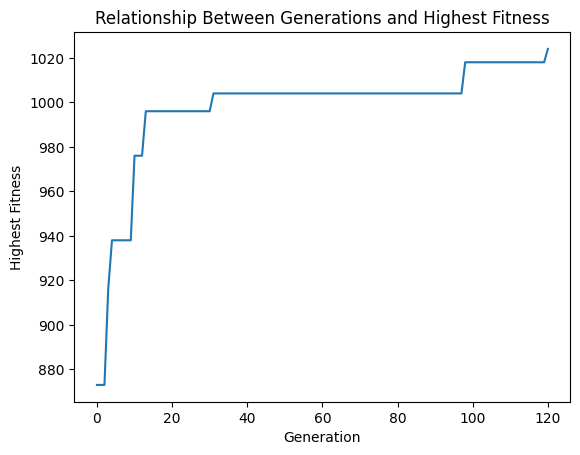

In [47]:
# Mostra a curva de convergência da melhor solução
ga.graph.highest_value_chromosome()
ga.graph.show()